# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}" 
    
    #url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        #from Xpert learning
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | parauapebas
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | la passe
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | bratsk
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | yagry
City not found. Skipping...
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | cavelossim
Processing Record 10 of Set 1 | majene
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | aras-asan
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | lagos
Processing Record 19 of Set 1 | ati
Processing Record 20 of Set 1 | weno
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | valreas
Processing 

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,parauapebas,-6.0675,-49.9022,300.14,83,75,0.00,BR,1706534956
1,thompson,55.7435,-97.8558,266.24,93,100,0.00,CA,1706534956
2,la passe,45.5549,-0.8967,288.28,78,100,6.45,FR,1706534956
3,port-aux-francais,-49.3500,70.2167,277.70,75,67,16.69,TF,1706534956
4,bratsk,56.1325,101.6142,248.42,98,15,1.48,RU,1706534957


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data_mod6/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("../output_data_mod6/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,parauapebas,-6.0675,-49.9022,300.14,83,75,0.00,BR,1706534956
1,thompson,55.7435,-97.8558,266.24,93,100,0.00,CA,1706534956
2,la passe,45.5549,-0.8967,288.28,78,100,6.45,FR,1706534956
3,port-aux-francais,-49.3500,70.2167,277.70,75,67,16.69,TF,1706534956
4,bratsk,56.1325,101.6142,248.42,98,15,1.48,RU,1706534957


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

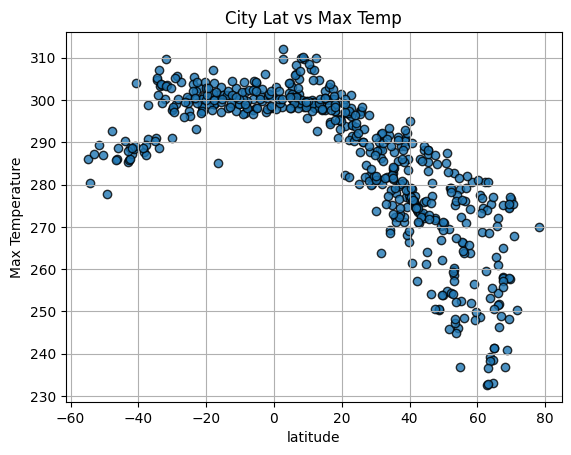

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolors= "black",
    linewidths= 1,
    marker= "o",
    alpha= 0.8,
    label= "cities"
)

# Incorporate the other graph properties
plt.title("City Lat vs Max Temp")
plt.xlabel("latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data_mod6/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

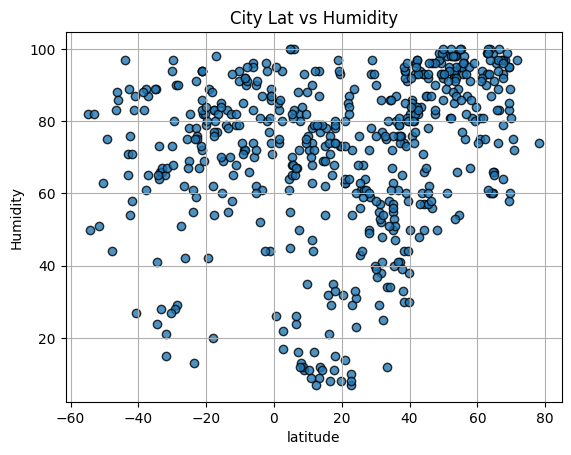

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolors= "black",
    linewidths= 1,
    marker= "o",
    alpha= 0.8,
    label= "cities"
)

# Incorporate the other graph properties
plt.title("City Lat vs Humidity")
plt.xlabel("latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data_mod6/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

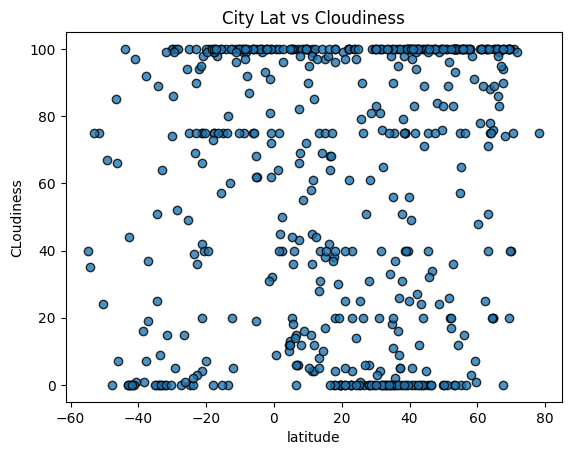

In [54]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolors= "black",
    linewidths= 1,
    marker= "o",
    alpha= 0.8,
    label= "cities"
)

# Incorporate the other graph properties
plt.title("City Lat vs Cloudiness")
plt.xlabel("latitude")
plt.ylabel("CLoudiness")
plt.grid(False)

# Save the figure
plt.savefig("../output_data_mod6/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

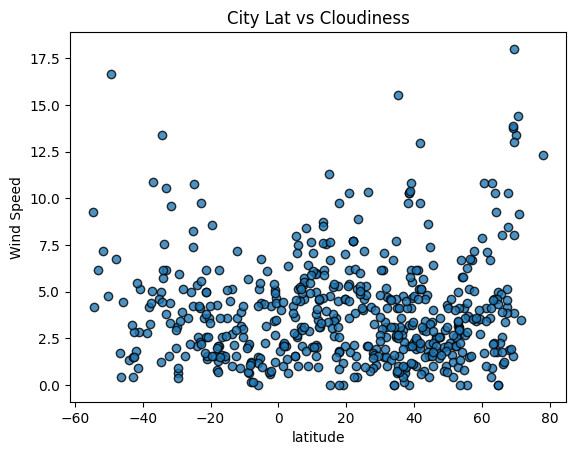

In [55]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolors= "black",
    linewidths= 1,
    marker= "o",
    alpha= 0.8,
    label= "cities"
)

# Incorporate the other graph properties
plt.title("City Lat vs Cloudiness")
plt.xlabel("latitude")
plt.ylabel("Wind Speed")
plt.grid(False)

# Save the figure
plt.savefig("../output_data_mod6/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
x_value = city_data_df['Lat']
y1_value = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y1_value)




In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,266.24,93,100,0.00,CA,1706534956
2,la passe,45.5549,-0.8967,288.28,78,100,6.45,FR,1706534956
4,bratsk,56.1325,101.6142,248.42,98,15,1.48,RU,1706534957
5,badger,64.8000,-147.5333,241.29,66,100,0.00,US,1706534957
6,ribeira grande,38.5167,-28.7000,290.80,94,75,10.28,PT,1706534957


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,parauapebas,-6.0675,-49.9022,300.14,83,75,0.00,BR,1706534956
3,port-aux-francais,-49.3500,70.2167,277.70,75,67,16.69,TF,1706534956
8,majene,-3.5403,118.9707,299.87,87,100,3.17,ID,1706534957
9,west island,-12.1568,96.8225,300.14,65,5,3.60,CC,1706534958
11,adamstown,-25.0660,-130.1015,297.45,78,100,4.21,PN,1706534958


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


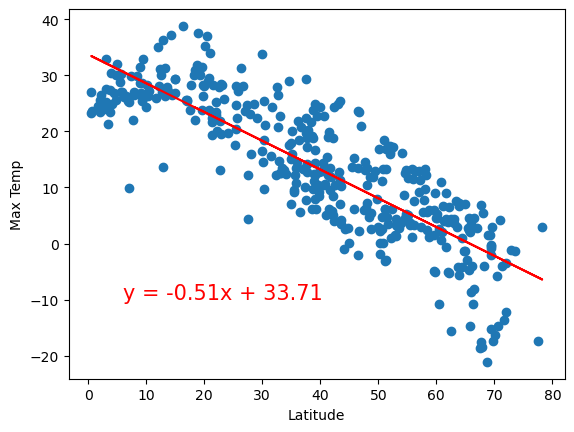

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


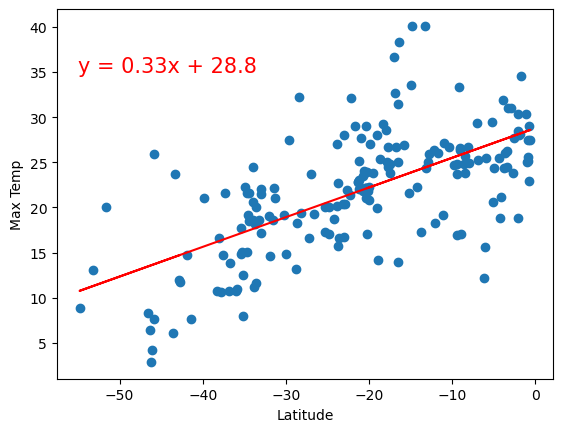

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


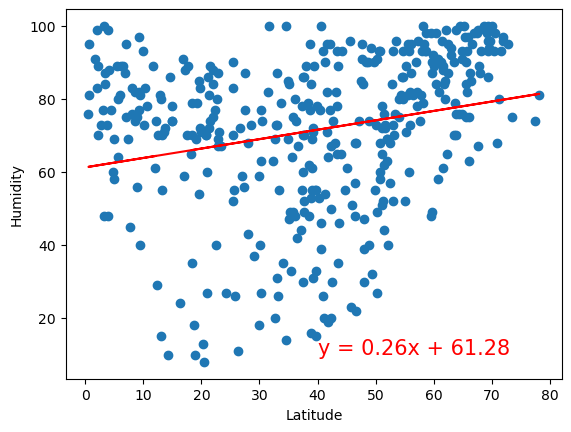

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


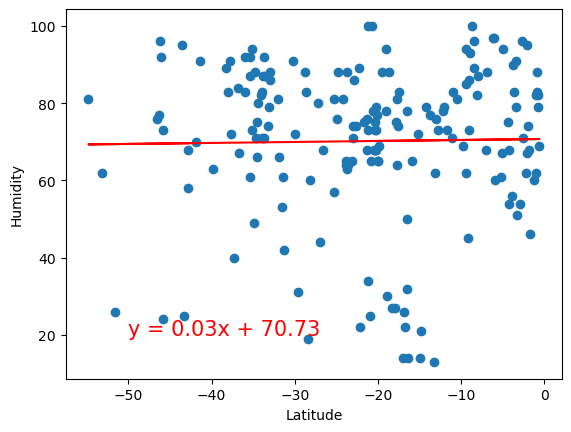

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


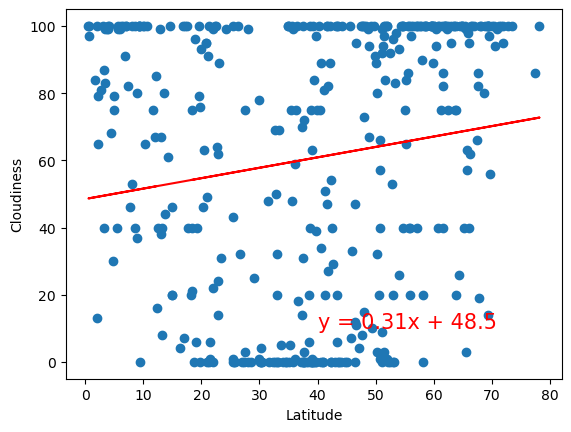

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


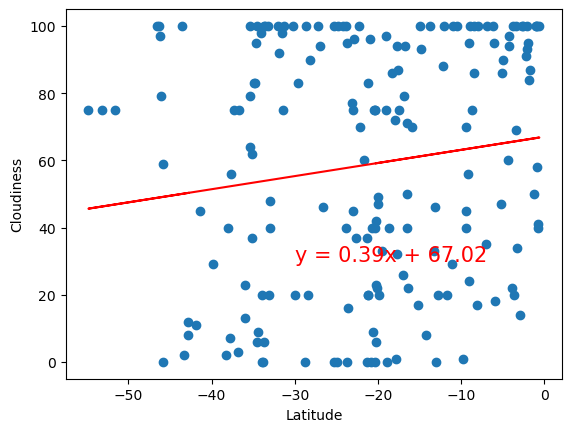

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


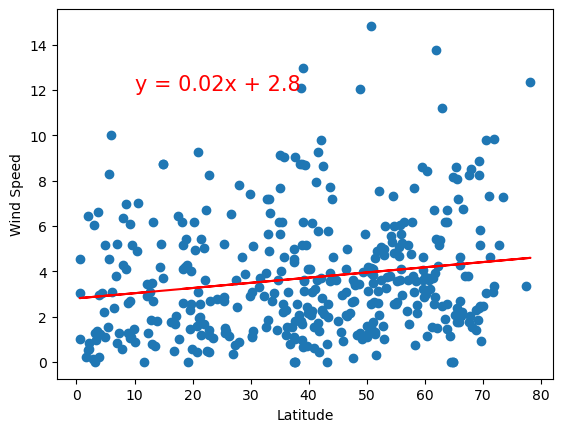

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


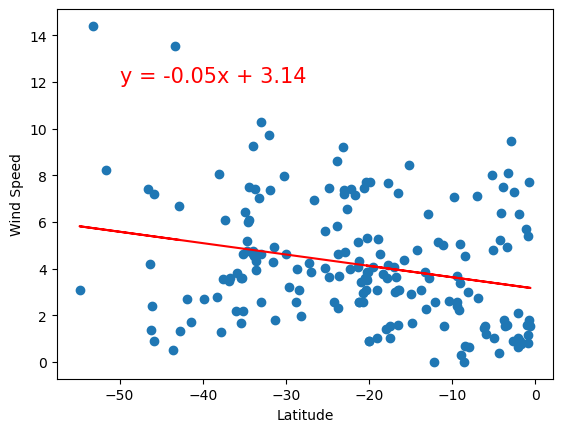

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE